In [3]:
from main import Manager
from bin.main import get_path

connections = get_path()
m = Manager(connections)

import pandas as pd 
import numpy as np 
import datetime 

df = m.Bonds.bond_df().set_index('DATE')
df.tail()

2025-04-09 16:47:07,576 - bin.options.optgd.db_connect - INFO - Options DB Initialized
2025-04-09 16:47:07,577 - bin.options.optgd.db_connect - WARNING - You currently have 8 connections open.
2025-04-09 16:47:07,582 - INFO - PriceDB Initialized successfully at 2025-04-09 16:47:07.582505
2025-04-09 16:47:07,582 - bin.price.db_connect - INFO - PriceDB Initialized successfully at 2025-04-09 16:47:07.582505
2025-04-09 16:47:07,584 - INFO - Established 3 database connections
2025-04-09 16:47:07,584 - bin.price.db_connect - INFO - Established 3 database connections
2025-04-09 16:47:07,712 - bin.alerts.options_alerts - INFO - Notifications instance initialized.


,1d,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
DATE,,,,,,,,,,,,
2025-04-02,4.33,4.38,4.32,4.24,4.04,3.91,3.89,3.95,4.07,4.20,4.58,4.54
2025-04-03,4.33,4.36,4.31,4.20,3.92,3.71,3.68,3.75,3.88,4.06,4.51,4.49
2025-04-04,4.33,4.36,4.28,4.14,3.86,3.68,3.66,3.72,3.84,4.01,4.44,4.41
2025-04-07,4.33,4.36,4.29,4.14,3.86,3.73,3.72,3.82,3.97,4.15,4.61,4.58
2025-04-08,4.33,4.36,4.31,4.14,3.83,3.71,3.71,3.88,4.05,4.26,4.76,4.71


(0.0, 7.5)

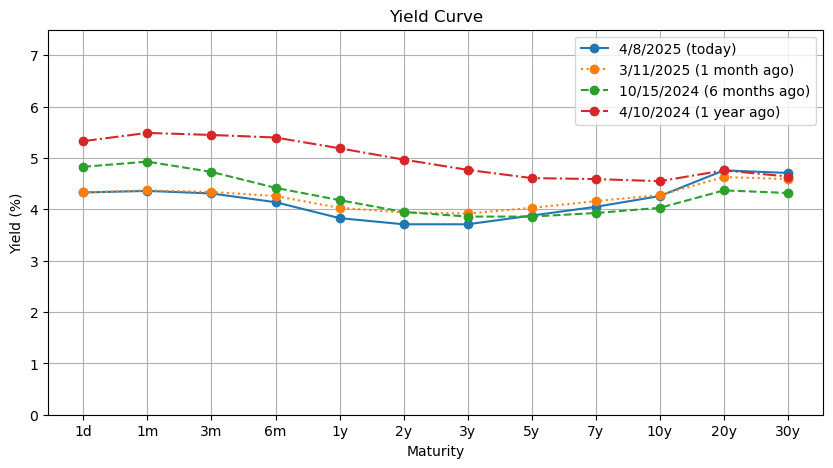

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation 

pdf = df.copy().sort_index()
cols = '1d 1m 3m 6m 1y 2y 3y 5y 7y 10y 20y 30y'.split()
pdf.columns = cols

today = pdf.index[-1]
one_month_ago = pdf.loc[datetime.datetime.now() - datetime.timedelta(days=30):].index[0]
six_months_ago = pdf.loc[datetime.datetime.now() - datetime.timedelta(days=180):].index[0]
one_year_ago = pdf.loc[datetime.datetime.now() - datetime.timedelta(days=365):].index[0]
two_years_ago = pdf.loc[datetime.datetime.now() - datetime.timedelta(days=730):].index[0]


fig, ax = plt.subplots(figsize=(10, 5))
# pdf.loc[today].plot(ax=ax, label = pdf.loc[today].name.strftime('%-m/%-d/%Y') + ' (today)')
ax.plot(pdf.columns, pdf.loc[today], marker = 'o', linestyle= '-', label = pdf.loc[today].name.strftime('%-m/%-d/%Y') + ' (today)')
ax.plot(pdf.columns, pdf.loc[one_month_ago], marker = 'o', linestyle= ':', label = pdf.loc[one_month_ago].name.strftime('%-m/%-d/%Y') + ' (1 month ago)')
ax.plot(pdf.columns, pdf.loc[six_months_ago], marker = 'o', linestyle= '--', label = pdf.loc[six_months_ago].name.strftime('%-m/%-d/%Y') + ' (6 months ago)')
ax.plot(pdf.columns, pdf.loc[one_year_ago], marker = 'o', linestyle= '-.', label = pdf.loc[one_year_ago].name.strftime('%-m/%-d/%Y') + ' (1 year ago)')

ax.legend()
ax.grid()
ax.set_title('Yield Curve')
ax.set_ylabel('Yield (%)')
ax.set_xlabel('Maturity')
ax.set_ylim(0, 7.5)

2025-04-09 16:47:22,898 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2025-04-09 16:47:23,014 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 16:47:23,014 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 16:47:23,016 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 16:47:23,017 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or date

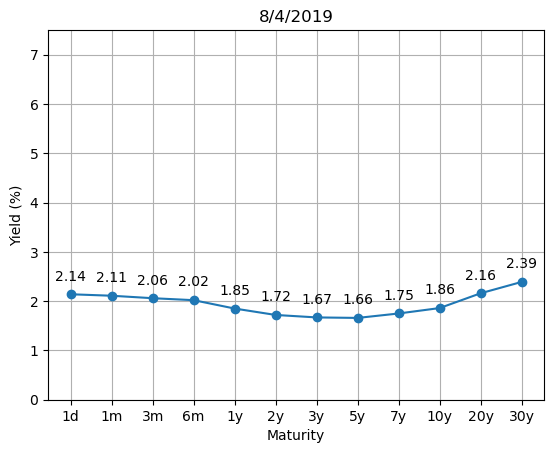

In [5]:
pdf = pdf["2019-08-01":].resample('W').last()
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.plot(pdf.columns, pdf.iloc[i], marker = 'o', linestyle= '-')
    # Annotate each point with the respective yield
    for j, txt in enumerate(pdf.iloc[i]):
        ax.annotate(f'{txt:.2f}', (pdf.columns[j], pdf.iloc[i][j]), textcoords="offset points", xytext=(0,10), ha='center')
    
    
    ax.set_title(pdf.index[i].strftime('%-m/%-d/%Y'))
    ax.set_ylabel('Yield (%)')
    ax.set_xlabel('Maturity')
    ax.set_ylim(0, 7.5)
    ax.grid()
    
ani = animation.FuncAnimation(fig, update, frames=len(pdf), interval=100, repeat_delay=1000)
ani.save('yield_curve.gif', writer='pillow', )